Data set is taken from here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379

In [62]:
# Import all the libraries used in the notebook
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import scale
%matplotlib inline
import hdbscan
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pprint import pprint

In [63]:
# read tab file of voting records (1948 - 2017)
df_votes = pd.read_csv('~/Documents/Capstone-UN/UNVotes1-72.tab',sep='\t')

In [64]:
len(df_votes.rcid.unique())

5598

# Initial EDA on Raw UNGA dataset

In [65]:
df_votes

,rcid,ccode,session,member,vote,Country,Countryname,year
0,3.0,2,1.0,1.0,1,USA,United States of America,1946
1,3.0,20,1.0,1.0,3,CAN,Canada,1946
2,3.0,31,1.0,NaN,9,BHS,Bahamas,1946
3,3.0,40,1.0,1.0,1,CUB,Cuba,1946
4,3.0,41,1.0,1.0,1,HTI,Haiti,1946
5,3.0,42,1.0,1.0,1,DOM,Dominican Republic,1946
6,3.0,51,1.0,NaN,9,JAM,Jamaica,1946
7,3.0,52,1.0,NaN,9,TTO,Trinidad and Tobago,1946
8,3.0,53,1.0,NaN,9,BRB,Barbados,1946
9,3.0,54,1.0,NaN,9,DMA,Dominica,1946


^^ This is what the dataset looks like. {rcid: resolution ID, ccode: Country Code,
session: Count of Assemblies from 1946, member: Country member code, vote: decision on resolution
.....rest is obvious}
vote – Vote choice
1 – Yes
2 – Abstain
3 – No
8 – Absent
9 – Not a member

In [66]:
# Very large dataset
df_votes.shape

(1099156, 8)

In [67]:
df_votes.dtypes
# All seem to be in usable format

rcid           float64
ccode          int64  
session        float64
member         float64
vote           int64  
Country        object 
Countryname    object 
year           int64  
dtype: object

In [68]:
df_votes.info()
# Indicates there are a huge numbermissing values in the member column.  
# This is because of time prior to a state becoming a member
print("Number of missing values in 'member':" +str(1098964-846858))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099156 entries, 0 to 1099155
Data columns (total 8 columns):
rcid           1099156 non-null float64
ccode          1099156 non-null int64
session        1098964 non-null float64
member         846858 non-null float64
vote           1099156 non-null int64
Country        1091797 non-null object
Countryname    1098987 non-null object
year           1099156 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 67.1+ MB
Number of missing values in 'member':252106


In [69]:
df_votes.describe(include=['object'])
# This suggests to me countries may have been renamed and kept the same country code.
# Requires further inquiry

,Country,Countryname
count,1091797,1098987
unique,198,200
top,BHS,"Venezuela, Bolivarian Republic of"
freq,5598,5598


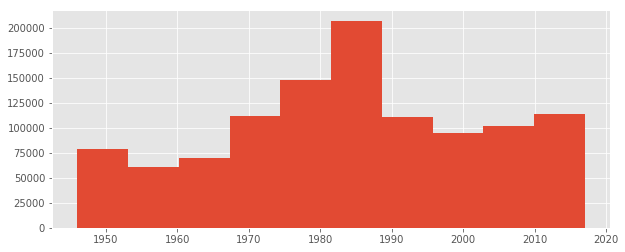

In [70]:
df_votes.year.hist(figsize=(10,4));
# looks like voting peaked in the 60's, and then flatlines, with an uptick over the last 7 years

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19ab1da0>,
      dtype=object)

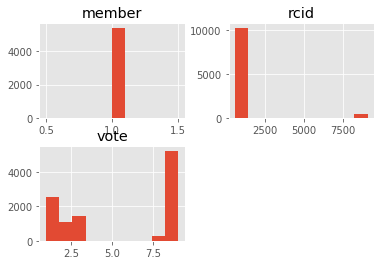

In [71]:
df_votes[df_votes.year == 1960][['vote','Countryname','rcid', 'member']].hist()
# This appears to show that: 1. There are more non-member votes than member votes in 1960
# resolution 'present' most likely.  There are a low number 8's for 'absent'.  These should
# be dropped, as an absence is usually due to a structural problem such as a civil war or
# financial crisis. 
# 3's show there are a large number of abstaining votes. 

In [72]:
print(df_votes[df_votes.year == 1960][['vote','Countryname','rcid', 'member']].head(10))
# it appears that countries are labeled as 'Nan' before the country joined the UN. 
# I can convert these values to represent a binary, 1 = member, 0 = non_member


        vote               Countryname   rcid  member
129626  1     United States of America  627.0  1.0   
129627  1     Canada                    627.0  1.0   
129628  9     Bahamas                   627.0 NaN    
129629  3     Cuba                      627.0  1.0   
129630  8     Haiti                     627.0  1.0   
129631  2     Dominican Republic        627.0  1.0   
129632  9     Jamaica                   627.0 NaN    
129633  9     Trinidad and Tobago       627.0 NaN    
129634  9     Barbados                  627.0 NaN    
129635  9     Dominica                  627.0 NaN    


In [73]:
# creating a df for 1960 alone
df_votes_1960 = df_votes[df_votes.year == 1960]

In [74]:
# I'm interested in just looking at the data for a single year since this will be my unit of analysis
df_votes_1960.head()

,rcid,ccode,session,member,vote,Country,Countryname,year
129626,627.0,2,15.0,1.0,1,USA,United States of America,1960
129627,627.0,20,15.0,1.0,1,CAN,Canada,1960
129628,627.0,31,15.0,NaN,9,BHS,Bahamas,1960
129629,627.0,40,15.0,1.0,3,CUB,Cuba,1960
129630,627.0,41,15.0,1.0,8,HTI,Haiti,1960


In [75]:
# Now I want to group by vote type. Just to see
df_votes_1960.vote.value_counts().sort_index()
#It looks like '9' for non-members is the dominant category. 

1    2577
2    1084
3    1461
8    276 
9    5240
Name: vote, dtype: int64

In [76]:
# Now I want to see which countries aren't members
# Appears to show that about 98 nations represented in the data set were not members
# at the time of voting.  Given the list of countries this make intuitive sense given
# that most are obviously not yet countries in 1960 or are developing nations, which
# in 1960 were not well represented in the UN General Assembly

df_votes[(df_votes.year == 1960) & (df_votes.vote == 9)].groupby('Countryname').sum().head()

,rcid,ccode,session,member,vote,year
Countryname,,,,,,
Algeria,52011.0,33210,810.0,0.0,486,105840
Andorra,52011.0,12528,810.0,0.0,486,105840
Angola,52011.0,29160,810.0,0.0,486,105840
Antigua and Barbuda,52011.0,3132,810.0,0.0,486,105840
Armenia,52011.0,20034,810.0,0.0,486,105840


In [77]:
# After confirming the meaning of non-member 'votes' I'm going to drop all of the countries
# in 1960 that were not members from the df_votes_1960 dataframe. I believe I can drop all
# non-member records from the entire df, but I will wait for the moment:

df_votes_1960_members = df_votes_1960[df_votes_1960.member == 1]

In [78]:
df_votes_1960_members.vote.value_counts().sort_index()
# I wonder where the 2 "9" value "non-member" votes are coming from.  Next cell

1    2577
2    1084
3    1461
8    276 
9    2   
Name: vote, dtype: int64

In [79]:
df_votes_1960_members[df_votes_1960_members.vote == 9]
# Nigeria is the only country that has a non-member vote as a member
# This is a coding error.  They became a member, but at the time of voting
# They were not yet a member.  This goes to the pt that dropping recodes based
# on recorded membership my create minor errors in this data set.  'Vote' is a more
# precise measure for indicating whether a country is a member at the time of the resolution


,rcid,ccode,session,member,vote,Country,Countryname,year
149821,9040.0,475,15.0,1.0,9,NGA,Nigeria,1960
150018,9041.0,475,15.0,1.0,9,NGA,Nigeria,1960


# Data Cleaning and Feature Engineering

In [80]:
# filter df for only voting members
df_votes = df_votes[df_votes.member == 1]

In [81]:
# Confirming that member column only reads "1" for voting members
df_votes.head(4)

,rcid,ccode,session,member,vote,Country,Countryname,year
0,3.0,2,1.0,1.0,1,USA,United States of America,1946
1,3.0,20,1.0,1.0,3,CAN,Canada,1946
3,3.0,40,1.0,1.0,1,CUB,Cuba,1946
4,3.0,41,1.0,1.0,1,HTI,Haiti,1946


In [82]:
# Dropping country and countryname. Using ccode as country key
df_votes_year = df_votes.drop(['Country', 'Countryname'], axis=1) 

In [83]:
# Set a DF to only yes and no votes (0 nd 3)
df_votes_year_binary = df_votes_year[(df_votes_year.vote <= 1) | (df_votes_year.vote == 3)]
df_votes_year_binary.head(2)

,rcid,ccode,session,member,vote,year
0,3.0,2,1.0,1.0,1,1946
1,3.0,20,1.0,1.0,3,1946


In [84]:
# Turn 1 = yes and 3 = no into 0 = no and 1 = yes
df_votes_year_binary.vote = df_votes_year_binary.vote.replace(to_replace=3, value=0, inplace=False, limit=None, regex=False, method='pad', axis=None)
df_votes_year_binary.head(2)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,rcid,ccode,session,member,vote,year
0,3.0,2,1.0,1.0,1,1946
1,3.0,20,1.0,1.0,0,1946


In [85]:
# drop session column and set equal to new df
df_year_features = df_votes_year_binary.drop(['session'], axis=1)

In [86]:
df_year_features.head(4)

,rcid,ccode,member,vote,year
0,3.0,2,1.0,1,1946
1,3.0,20,1.0,0,1946
3,3.0,40,1.0,1,1946
4,3.0,41,1.0,1,1946


In [87]:
# Vote multiplied by res to create a new v_res column that gives the resolution number if 
# There was a yes vote.  This will be used later to create dummy columns
df_year_features['v_res'] = df_year_features['rcid']*df_year_features['vote']

In [88]:
#I'm creating a df that has one record for every UN nation so that it can be merged with our output later
df_name_index = pd.DataFrame(df_votes.groupby(['ccode', 'Countryname','Country'])['Countryname'].count())
df_name_index['count'] = df_name_index.Countryname
df_name_index = df_name_index.drop([ 'Countryname','count'], axis=1)
df_name_index.reset_index(inplace=True)
df_name_index.head(2)

,ccode,Countryname,Country
0,2,United States of America,USA
1,20,Canada,CAN


# Create function to create DFs for multiple years

In [89]:
# This function takes a year as an argument and returns a df with 1s and 0s indicating whether each member country
# voted on each resolution proposed in a that year
def create_year_df(year):
    df_output_year = df_year_features[df_year_features['year'] == year]
    df_output_year = pd.concat([df_output_year,pd.get_dummies(df_output_year.v_res, prefix='res_')], axis = 1)
    #print(df_output_year)
    try:
        df_output_year = df_output_year.drop(['year','rcid','member','v_res','vote', 'res__0.0'], axis=1)
    except:
        pass 
    df_output_year = df_output_year.set_index('ccode')
    df_output_year = df_output_year.groupby('ccode').sum()
    
    return df_output_year
create_year_df(1948);

In [90]:
# creating dictionary of years and corresponding dataframe names passing aech value from the 
# groups list into the for loop at the bottom of the cell
frames = {}
groups = [1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,  
          1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
          1975, 1976, 1977, 1978, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1986, 1988, 1989,
          1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
          2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
for grp in groups: 
    frames[grp] = create_year_df(grp)  

In [91]:
# Making sure my keys correspond with the groups list created in the last cell
frames.keys()

dict_keys([1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [92]:
# Confirming that the dataframe looks proper
frames.get(1946).head(4)

,res__3.0,res__4.0,res__5.0,res__6.0,res__7.0,res__8.0,res__9.0,res__10.0,res__11.0,res__12.0,...,res__36.0,res__37.0,res__38.0,res__39.0,res__40.0,res__41.0,res__42.0,res__43.0,res__44.0,res__45.0
ccode,,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,1,1,1,1,...,0,0,1,0,1,0,0,1,1,1
20,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,0
40,1,0,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,1,0
41,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,1,1,0,0


In [93]:
# read in descr file
df_descriptions = pd.read_csv('~/documents/UN-Capstone/Dscription.csv',skipinitialspace=True)

In [94]:
# Looking at contents of the descr file
df_descriptions.head(2)

,Unnamed: 0,session,rcid,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,year
0,1,1,3,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE","TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL REFERRING THE PROVISIONAL RULES OF PROCEDURE AND ANY AMENDMENTS THEREOF TO THE 6TH COMMITTEE, SAID AMENDMENT PRESCRIBING A 1-WEEK TIME LIMIT WITHIN WHICH THE 6TH COMM. MUST SUBMIT ITS REPORT ON THE",0,0,0,0,0,0,1946
1,2,1,4,8,9,34,0,1946-01-02,R/1/79,0.0,0.0,SECURITY COUNCIL ELECTIONS,"TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON AND POSTPONINGELECTIONS OF THE NON-PERMANENT MEMBERS OF THE SECURITY COUNCIL, TO THE FOLLOWING WEEK.",0,0,0,0,0,0,1946


In [95]:
# grouping resolutions by year
b = df_descriptions.groupby('year')['year'].count()

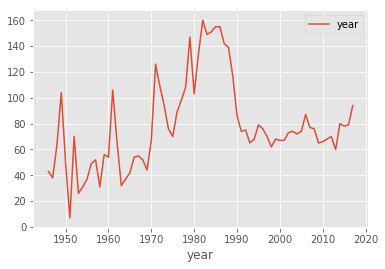

In [96]:
#Visualizing how many resolutions per year

b.plot(x=None, y='Count', kind='line', ax=None, subplots=False, sharex=None, 
      sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, 
      legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, 
      xlim=None, ylim=None, rot=None, fontsize=None, 
      colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False)

In [97]:
df_votes.rcid.dtypes

dtype('float64')

## Output function

Estimated number of clusters: 2
Silhouette Coefficient: 0.475710


 Cluster 0: 27 
 ['Canada', 'United Kingdom of Great Britain and Northern Ireland', 'Ireland', 'Netherlands', 'Belgium', 'Luxembourg', 'France', 'Liechtenstein', 'Spain', 'Portugal', 'Germany', 'Poland', 'Austria', 'Hungary', 'Czechoslovakia', 'Italy', 'Malta', 'Greece', 'Romania', 'Finland', 'Sweden', 'Norway', 'Denmark', 'Iceland', 'Japan', 'Australia', 'New Zealand']


 Cluster 1: 113 
 ['Bahamas', 'Cuba', 'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Mexico', 'Belize', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Colombia', 'Venezuela, Bolivarian Republic of', 'Guyana', 'Suriname', 'Ecuador', 'Peru', 'Brazil', 'Bolivia (Plurinational State of)', 'Paraguay', 'Chile', 'Argentina', 'Uruguay', 'Albania', 'Yugoslavia', 'Cyprus', 'Bulgaria', 'Russian Federation', 'Ukraine', 'Belarus', 'Cabo Verde', 'Guinea Bissau', 'Gambia (I

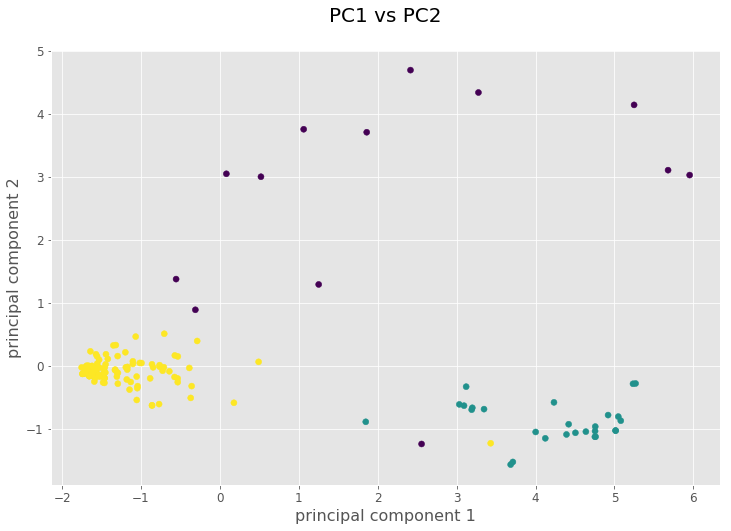

In [98]:
# This function forms the basis of the project's finished product and contrains code for prosessing the 
# UN vote DFs and; running through HDBSCAN to create lusters, printing the number of clusters, printing
# a silhouette score, printing a list of countries in each cluster, running the df through PCA analysis, 
# outputting a visualization of clusters based on principle components 1 and 2, and listing the resultions
# which caused the groupings (top 5 contriubuting the most to vaiance)

def output_all(year):
    #HDBSCAN:
    hdbscn = hdbscan.HDBSCAN(min_cluster_size = 15, min_samples = 5, 
               gen_min_span_tree = True)
    hdbscn.fit(frames.get(year))
    hdbscn_labels = hdbscn.labels_
    hdbscn_n_clusters_ = len(set(hdbscn_labels)) - (1 if -1 in hdbscn_labels else 0)
    
    df_output_year = create_year_df(year);
    df_output_year['cluster'] = hdbscn.labels_
    df_output_year.reset_index(inplace=True)
    df_output_year = pd.merge(df_output_year, df_name_index, on='ccode')
    
    #Create cluster lists
    cluster0_list = df_output_year[df_output_year.cluster == 0]['Countryname'].tolist()
    cluster1_list = df_output_year[df_output_year.cluster == 1]['Countryname'].tolist()
    cluster2_list = df_output_year[df_output_year.cluster == 2]['Countryname'].tolist()
    cluster_Outlier_list = df_output_year[df_output_year.cluster == -1]['Countryname'].tolist()

    #PCA:
    df_PCA = df_output_year.drop(['Countryname','Country'], axis=1)
    df_features = df_PCA
    X = df_PCA
    X = X.set_index('ccode')
    pca = PCA()
    pca = pca.fit(X)
    Z = pca.transform(X)
    features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
    
    Z = pd.DataFrame(Z, columns=features_pca)
    X.reset_index(inplace=True)
    X = X[['ccode','cluster']]
    
    X = X.join(Z, lsuffix='_caller', rsuffix='_other')
    df_PCA = pd.merge(X, df_PCA, on='ccode')
    df_PCA = df_PCA[['ccode','cluster_x',"PC1","PC2"]] 
    
    # Rolling Out PC1 components:
    PCA_abs = abs((pca.components_))[0]
    df_features = df_features.set_index(['ccode','cluster'])
    t = zip(df_features.columns, PCA_abs)
    result_list = list(t)
    df_componenets = pd.DataFrame(result_list)
    df_componenets.columns = ['rcid', 'score']
    df_componenets = df_componenets.sort_values('score',ascending=False)
    df_componenets['rcid'] = df_componenets['rcid'].map(lambda x: x.lstrip('res__'))
    df_componenets['rcid'] = df_componenets['rcid'].astype(float)
  
    df_componenets = pd.merge(df_componenets, df_descriptions, on='rcid')
    df_pca_desc = df_componenets.descr
    df_componenets = df_componenets.drop(['abstain','session','date',
                                          'importantvote','unres','amend',
                                          'para', 'year','Unnamed: 0','descr','me', 'nu','di', 'hr', 'co','ec',], axis=1) #,'short'
    
    pd.set_option('display.max_colwidth',110)
    
    #Plot PCA
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca()
    ax.scatter(Z.iloc[:,0], Z.iloc[:,1],
                       c=df_PCA.cluster_x)
    ax.set_xlabel('principal component 1', fontsize=16)
    ax.set_ylabel('principal component 2', fontsize=16)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
 
    pd.set_option('display.max_colwidth', -1)   
    ax.set_title('PC1 vs PC2\n', fontsize=20)
    #print(plt.show())
    
    # print HDBSCAN RESULTS:

    print('Estimated number of clusters: %d' % hdbscn_n_clusters_)
    # print('Homogeneity: %0.6f' % metrics.homogeneity_score(frames.get(year), hdbscn_labels))
    # print('Completeness: %0.6f' % metrics.completeness_score(y, hdbscn_labels))
    print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(frames.get(year), hdbscn_labels))
    
    print ("\n\n","Cluster 0:",len(cluster0_list),"\n",cluster0_list)
    print ("\n\n","Cluster 1:",len(cluster1_list),"\n",cluster1_list)
    if len(cluster2_list) > 0:
        print ("\n\n","Cluster 2:",len(cluster2_list),"\n",cluster2_list)
    else: ""
    
    print ("\n\n","Outliers:",len(cluster_Outlier_list),"\n",cluster_Outlier_list)
    
    print('\n',df_componenets.head(10))
    #return df_pca_desc.head(10)

    
output_all(1990)  

In [99]:
# When looking at the above output I was able to do this: I noticed that in 1960 a majority of the resolutions
# having the greatest weighting from PCA analysis related to resolution related to the Repulic of the Congo.
# I can see that the clusters there appears to be a a split along traditional cold war lines.  If I googel Congo
# 1960: https://en.wikipedia.org/wiki/Congo_Crisis#United_Nations_escalation_and_the_end_of_the_Katangese_secession
# "Congo Crisis" comes up on the top.  The page says that there "August 1960, Central Intelligence Agency (CIA) 
# agents in the region reported to their agency that "Congo [is] experiencing [a] classic communist ... takeover" 
# and warned that the Congo might follow the same path as Cuba.". So, not perfect, but the results seem useful.

In [100]:
interact(output_all, year=widgets.IntSlider(min=1960,max=2017,step=1))

interactive(children=(IntSlider(value=1960, description='year', max=2017, min=1960), Output()), _dom_classes=('widget-interact',))

<function __main__.output_all>

In [101]:
#HDBSCAN:
hdbscn = hdbscan.HDBSCAN(min_cluster_size = 15, min_samples = 5, 
           gen_min_span_tree = True)
hdbscn.fit(frames.get(1990))
hdbscn_labels = hdbscn.labels_
hdbscn_n_clusters_ = len(set(hdbscn_labels)) - (1 if -1 in hdbscn_labels else 0)

df_output_year = create_year_df(1990);
df_output_year['cluster'] = hdbscn.labels_
df_output_year.reset_index(inplace=True)
df_output_year = pd.merge(df_output_year, df_name_index, on='ccode')

#Create cluster lists
cluster0_list = df_output_year[df_output_year.cluster == 0]['Countryname'].tolist()
cluster1_list = df_output_year[df_output_year.cluster == 1]['Countryname'].tolist()
cluster2_list = df_output_year[df_output_year.cluster == 2]['Countryname'].tolist()
cluster_Outlier_list = df_output_year[df_output_year.cluster == -1]['Countryname'].tolist()

df_output_year = df_output_year[['ccode','cluster','Countryname','Country']]
df_output_year

print ("\n\n","Cluster 0:",len(cluster0_list),"\n",cluster0_list)
print ("\n\n","Cluster 1:",len(cluster1_list),"\n",cluster1_list)
if len(cluster2_list) > 0:
    print ("\n\n","Cluster 2:",len(cluster2_list),"\n",cluster2_list)
else: ""

print ("\n\n","Outliers:",len(cluster_Outlier_list),"\n",cluster_Outlier_list)
    



 Cluster 0: 27 
 ['Canada', 'United Kingdom of Great Britain and Northern Ireland', 'Ireland', 'Netherlands', 'Belgium', 'Luxembourg', 'France', 'Liechtenstein', 'Spain', 'Portugal', 'Germany', 'Poland', 'Austria', 'Hungary', 'Czechoslovakia', 'Italy', 'Malta', 'Greece', 'Romania', 'Finland', 'Sweden', 'Norway', 'Denmark', 'Iceland', 'Japan', 'Australia', 'New Zealand']


 Cluster 1: 113 
 ['Bahamas', 'Cuba', 'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Mexico', 'Belize', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Colombia', 'Venezuela, Bolivarian Republic of', 'Guyana', 'Suriname', 'Ecuador', 'Peru', 'Brazil', 'Bolivia (Plurinational State of)', 'Paraguay', 'Chile', 'Argentina', 'Uruguay', 'Albania', 'Yugoslavia', 'Cyprus', 'Bulgaria', 'Russian Federation', 'Ukraine', 'Belarus', 'Cabo Verde', 'Guinea Bissau', 'Gambia (Islamic Republic of the)', 'Mali', 'Senegal', 'Mauritania', 'Niger

In [102]:
df_GDP = pd.read_csv('~/documents/Capstone-UN/UNdata_Export_GDP copy.csv',skipinitialspace=True)
df_GDP.sort_values('Year')

,Countryname,Year,Item,GDP
9445,Zimbabwe,1970,Gross Domestic Product (GDP),390.776187
879,Belize,1970,Gross Domestic Product (GDP),206.342820
6436,Oman,1970,Gross Domestic Product (GDP),370.807041
5093,Luxembourg,1970,Gross Domestic Product (GDP),4443.145969
7598,Seychelles,1970,Gross Domestic Product (GDP),425.317542
2128,Cook Islands,1970,Gross Domestic Product (GDP),477.528833
5778,Montserrat,1970,Gross Domestic Product (GDP),670.211528
3333,Gabon,1970,Gross Domestic Product (GDP),694.554277
7195,Saint Kitts and Nevis,1970,Gross Domestic Product (GDP),555.816375
3286,French Polynesia,1970,Gross Domestic Product (GDP),2378.558474


In [103]:
df_GDP1990 = df_GDP[df_GDP.Year == 1990]
df_output_wGDP = pd.merge(df_GDP1990,df_output_year, on='Countryname')
print(df_output_wGDP.GDP[df_output_wGDP.cluster == -1].mean())
print(df_output_wGDP.GDP[df_output_wGDP.cluster == 0].mean())
print(df_output_wGDP.GDP[df_output_wGDP.cluster == 1].mean())

3005.5895160666664
19407.39900985185
2631.5353112176917


In [104]:
# Drop outliers
df_output_wGDP 
df_knn = df_output_wGDP.drop(df_output_wGDP[df_output_wGDP.cluster==-1].index)

In [105]:
df_knn.head()

,Countryname,Year,Item,GDP,ccode,cluster,Country
0,Afghanistan,1990,Gross Domestic Product (GDP),295.662201,700,1,AFG
1,Albania,1990,Gross Domestic Product (GDP),654.227007,339,1,ALB
2,Algeria,1990,Gross Domestic Product (GDP),2383.085110,615,1,DZA
3,Angola,1990,Gross Domestic Product (GDP),1123.178423,540,1,AGO
4,Antigua and Barbuda,1990,Gross Domestic Product (GDP),6889.004721,58,1,ATG


In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [107]:
y = df_knn['cluster'].values
X = df_knn[['GDP']]

In [108]:
np.mean(y)

0.7938931297709924

In [112]:
knn = KNeighborsClassifier(n_neighbors=36, weights='distance')

scores = cross_val_score(knn, X, y, cv=5)
np.mean(scores), np.std(scores)

(0.91588603988604, 0.045100921275442594)

In [113]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=36, p=2,
           weights='distance')

In [114]:
y_pred_class = knn.predict(X)
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred_class))

1.0


In [115]:
knn.predict(X)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=55)

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
print (slr.score(X_test, y_test))

0.08246847823925729


In [121]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=36, p=2,
           weights='distance')

In [122]:
knn.score(X_test, y_test)

0.8734177215189873